# Score Predictor given the state of the match

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('2nd_inning_data.csv')

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['toss_decision','toss_winner','batting_team','bowling_team'])
]
,remainder='passthrough')

In [12]:
from sklearn.metrics import log_loss
# Split the data into X and y
X = df.drop('winning_team', axis=1)
X = X.drop('Index', axis=1)
X = X.drop('venue', axis=1)
X = X.drop('final_team_total', axis=1)
y = df['final_team_total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47887 entries, 0 to 47886
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_runs_delivery  47887 non-null  int64  
 1   toss_decision        47887 non-null  object 
 2   toss_winner          47887 non-null  object 
 3   batting_team         47887 non-null  object 
 4   bowling_team         47887 non-null  object 
 5   wickets_fallen       47887 non-null  int64  
 6   runs_remain          47887 non-null  float64
 7   current_team_total   47887 non-null  int64  
 8   team_run_rate_2      47887 non-null  float64
 9   team_run_rate_diff   47887 non-null  float64
 10  over                 47887 non-null  int64  
 11  delivery             47887 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 4.4+ MB


In [13]:
# Create the pipeline
from sklearn.ensemble import RandomForestClassifier


pipe = Pipeline([
    ('trf', trf),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Fit the model
pipe.fit(X_train, y_train)

# Predict the labels
y_pred_test = pipe.predict(X_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'The accuracy of the model is: {accuracy:.2f}')

# predict the final score for test data
y_pred = pipe.predict(X_test)

# Create a DataFrame with the results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


results.head(50)

c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The accuracy of the model is: 0.98


,Actual,Predicted
6049,87,87
9100,187,187
2385,138,138
1900,144,144
30675,101,101
42911,149,149
44454,158,158
16228,146,146
34110,166,166
40435,126,126


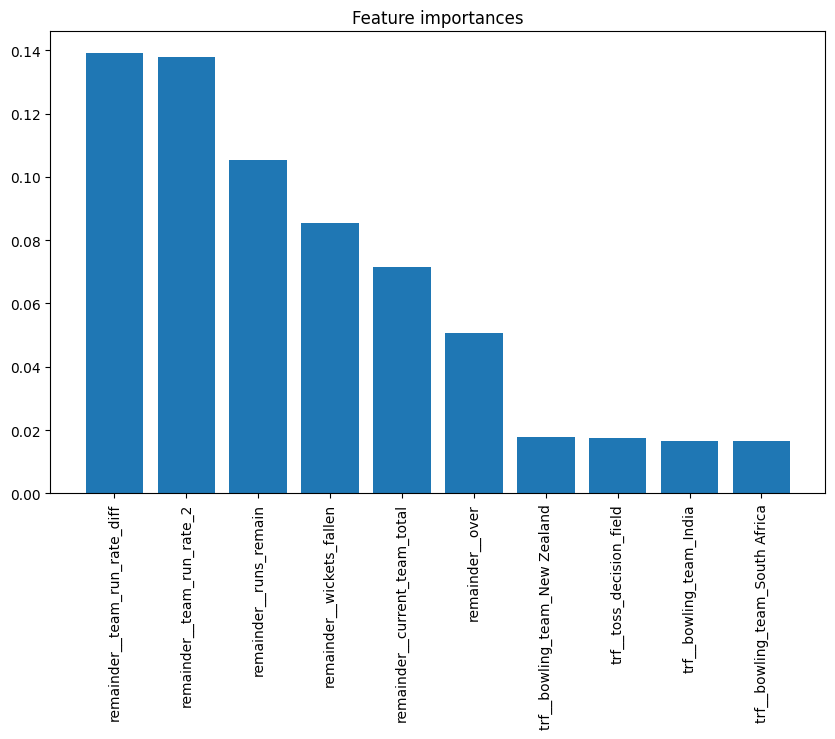

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# plot a graph to show the feature importance
# only pick the top 10 features

importances = pipe.named_steps['clf'].feature_importances_
features = pipe.named_steps['trf'].get_feature_names_out()
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.show()

C:\Users\ajani\AppData\Local\Temp\ipykernel_32780\4199142288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_test)


<Axes: ylabel='Density'>

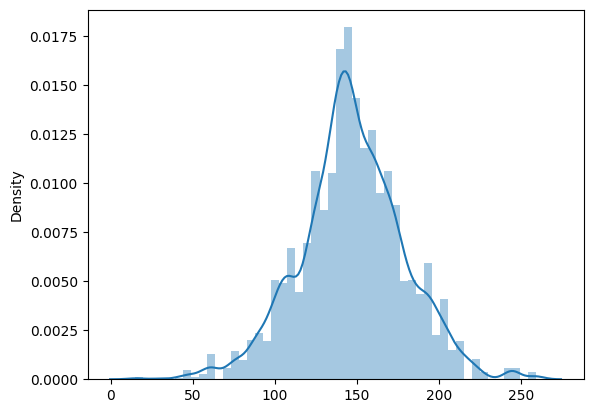

In [15]:
import seaborn as sns
sns.distplot(y_pred_test)

In [16]:
from sklearn import metrics

# Make predictions on the training data
y_train_pred = pipe.predict(X_train)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = metrics.r2_score(y_train, y_train_pred)

# Make predictions on the testing data
y_test_pred = pipe.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Metrics:
MAE: 0.00010441410634576731
MSE: 0.00041765642538306924
RMSE: 0.02043664418105549
R-squared (R²): 0.9999995896562359

Testing Metrics:
MAE: 0.695343495510545
MSE: 36.41177698893297
RMSE: 6.03421718112076
R-squared (R²): 0.9644737603561353


In [17]:
# Cross validate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
print(f'The accuracy of the model is: {scores.mean():.2f} +/- {scores.std():.2f}')

c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in

The accuracy of the model is: 0.30 +/- 0.08


## XGBRegressor

In [28]:
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

# Create the pipeline
pipe2 = Pipeline([
    ('trf', trf),
    ('scaler', StandardScaler()),
    ('clf', XGBRegressor(random_state=42))
])

# Fit the model
pipe2.fit(X_train, y_train)

# Predict the labels
y_pred_test = pipe2.predict(X_test)

# Calculate the accuracy
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

# Convert y_test and y_pred_test to numpy arrays
y_test = np.array(y_test)
y_pred_test = np.array(y_pred_test)

print(f'The accuracy of the model is: {custom_accuracy(y_test, y_pred_test, 10):.2f}')

# Create a DataFrame with the results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


results.head(50)

c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The accuracy of the model is: 82.76


,Actual,Predicted
0,87,115.654076
1,187,186.524261
2,138,145.991409
3,144,144.074936
4,101,101.377327
5,149,150.682404
6,158,162.044220
7,146,152.822495
8,166,163.157806
9,126,127.674194


In [29]:
# Make predictions on the training data
y_train_pred = pipe2.predict(X_train)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = metrics.r2_score(y_train, y_train_pred)

# Make predictions on the testing data
y_test_pred = pipe2.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Metrics:
MAE: 5.221255009050311
MSE: 56.9128446187052
RMSE: 7.544060221041796
R-squared (R²): 0.9440836307946184

Testing Metrics:
MAE: 6.0810586344252355
MSE: 82.53713961793748
RMSE: 9.084995300930952
R-squared (R²): 0.9194701702562555


C:\Users\ajani\AppData\Local\Temp\ipykernel_32780\1363667815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred)


<Axes: ylabel='Density'>

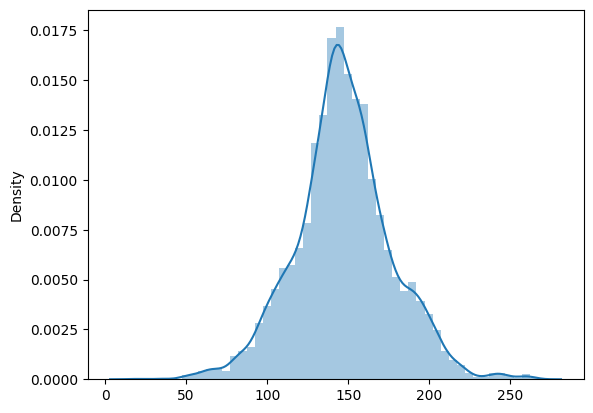

In [21]:
import seaborn as sns
sns.distplot(y_test_pred)

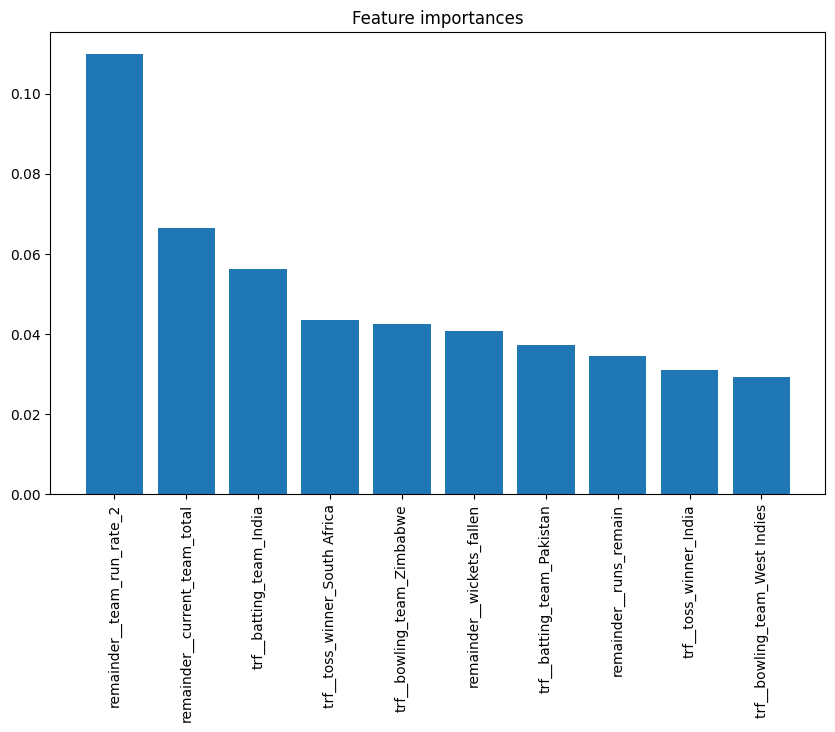

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# plot a graph to show the feature importance
# only pick the top 10 features

importances = pipe2.named_steps['clf'].feature_importances_
features = pipe2.named_steps['trf'].get_feature_names_out()
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.show()